In [1]:
from dataset_utils import explore, show_hist, show_samples, parse_pfd_to_csv, parse_wider_to_csv

In [2]:
PFD_ANN = '/datasets/PennFudanPed/PennFudanPed/Annotation/'
WIDER_ANN = '/datasets/Wider_Person/WiderPerson/'
ds = {'PennFudanPed': (PFD_ANN, 'converted/annotations/*.json'),
        'Wider': (WIDER_ANN, 'Annotations/*.txt')}

In [3]:
pennfudan_df = explore(*ds['PennFudanPed'])
pennfudan_df.head()

,name,rects_num,mean_width,mean_height,path
0,FudanPed00045,2,85.000000,288.000000,/home/olysavra/everguard/datasets/PennFudanPed...
1,PennPed00084,1,101.000000,257.333333,/home/olysavra/everguard/datasets/PennFudanPed...
2,FudanPed00021,3,67.333333,143.333333,/home/olysavra/everguard/datasets/PennFudanPed...
3,PennPed00051,4,133.500000,295.750000,/home/olysavra/everguard/datasets/PennFudanPed...
4,PennPed00079,1,118.000000,295.000000,/home/olysavra/everguard/datasets/PennFudanPed...


In [4]:
show_hist(pennfudan_df, 'PennFudanPed')

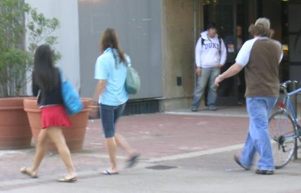

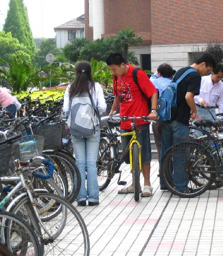

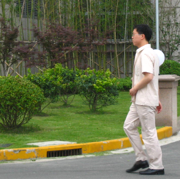

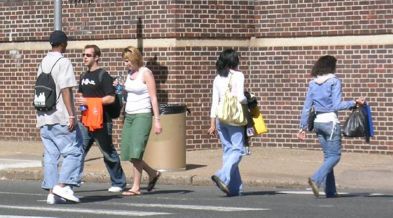

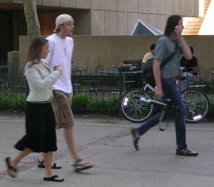

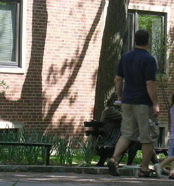

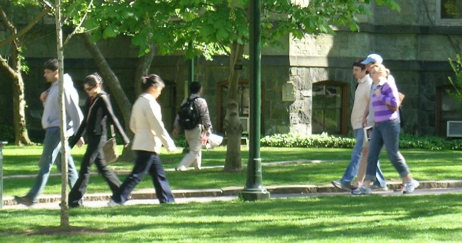

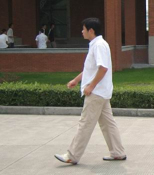

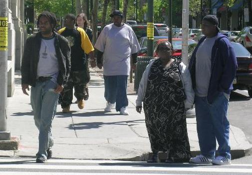

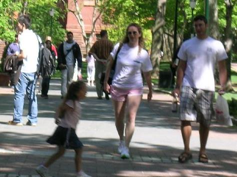

In [5]:
show_samples(pennfudan_df)

In [6]:
parsed_pfd = parse_pfd_to_csv(*ds['PennFudanPed'])
parsed_pfd.to_csv(PFD_ANN+'pfd.csv', sep=',')
parsed_pfd.head()

,filename,widht,height,class,xmin,ymin,xmax,ymax
0,FudanPed00045.png,487,538,person,198,198,294,481
1,FudanPed00045.png,487,538,person,319,201,404,499
2,FudanPed00045.png,487,538,person,395,212,469,495
3,PennPed00084.png,370,356,person,142,46,310,342
4,PennPed00084.png,370,356,person,274,21,362,334


In [7]:
parsed_wider = parse_wider_to_csv(*ds['Wider'])
wider_scale = parsed_wider.ymax-parsed_wider.ymin
parsed_wider['scale'] = wider_scale

In [8]:
parsed_wider.describe()

,xmin,ymin,xmax,ymax,width,height,scale
count,178593.000000,178593.000000,178593.000000,178593.000000,178593.000000,178593.000000,178593.000000
mean,336.808178,219.641487,380.773603,329.742398,717.867358,494.658262,110.100911
std,337.160074,201.660976,355.286490,259.909677,499.415638,353.032520,108.204285
min,0.000000,0.000000,3.000000,13.000000,148.000000,120.000000,5.000000
25%,143.000000,124.000000,182.000000,211.000000,500.000000,336.000000,52.000000
50%,285.000000,178.000000,325.000000,278.000000,600.000000,400.000000,84.000000
75%,441.000000,250.000000,482.000000,365.000000,750.000000,529.000000,136.000000
max,5860.000000,4195.000000,5999.000000,4489.000000,6016.000000,4524.000000,2837.000000


In [9]:
wider = parsed_wider.loc[(parsed_wider['scale'] > 130) & (parsed_wider['scale'] < 400)]
del wider['scale']

In [10]:
parsed_wider.to_csv(WIDER_ANN+'wider.csv', sep=',')